In [245]:
import numpy as np
import matplotlib.pyplot as plt

from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model

from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

In [143]:
X, Y = load_planar_dataset()

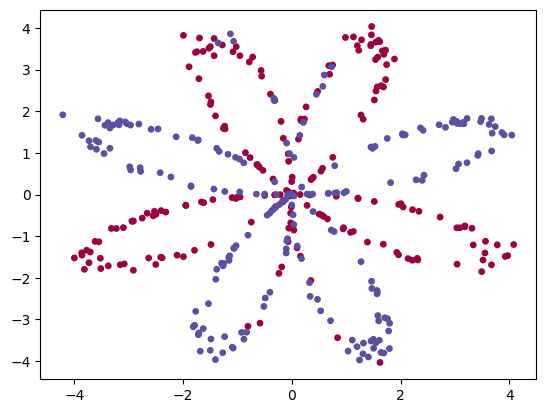

In [145]:
plt.scatter(X[0, :], X[1,:], c=Y, s=15, cmap = plt.cm.Spectral)

In [146]:
shape_x= X.shape
shape_y= Y.shape
m= Y.shape[1]

print("The shape of X is: " + str(shape_x))
print("The shape of Y is: " + str(shape_y))
print("The no. of training examples are: " + str(m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
The no. of training examples are: 400


In [149]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.ravel())

LogisticRegressionCV()

C:\Users\DEll\AppData\Local\Temp\ipykernel_22856\2829508523.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Accuracy of logistic regression: %d percent of correctly labeled datapoints'  %accuracy )


Accuracy of logistic regression: 47 percent of correctly labeled datapoints


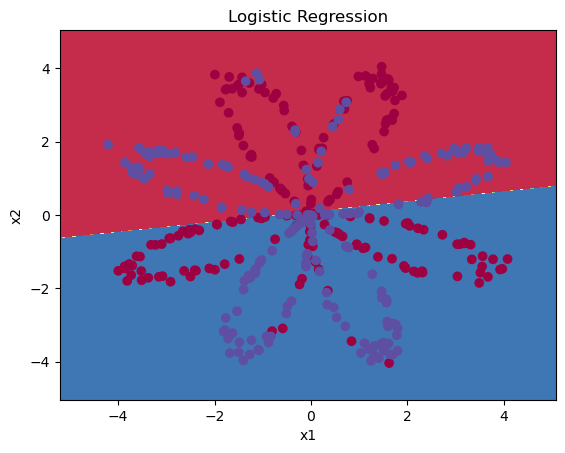

In [215]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

#Print Accuracy
LR_predictions = clf.predict(X.T)
accuracy = (np.dot(Y, LR_predictions) + np.dot(1 - Y, 1 - LR_predictions)) / float(Y.size) * 100

print('Accuracy of logistic regression: %d percent of correctly labeled datapoints'  %accuracy )
#print('Accuracy of logistic regression:  %d  ' % float((np.dot(Y, LR_predictions) + np.dot(1-Y, 1-LR_predictions)) / float(Y.size)*100) + '%' + "percentage of correctly labeled datapoints")

In [239]:
def layer_sizes(X, Y):
    n_x= X.shape[0]
    n_h= 4
    n_y= Y.shape[0]
    
    return (n_x, n_h, n_y)

In [249]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [279]:
def initialize_parameters(n_x, n_h, n_y):

    w1= np.random.rand(n_h, n_x) * 0.01
    b1= np.zeros(shape = (n_h, 1))
    w2= np.random.rand(n_y, n_h) * 0.01
    b2= np.zeros(shape = (n_y,1 ))

    assert(w1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(w2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2        
    }
    return parameters 

In [291]:
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)

print("w1:  " + str(parameters["w1"]))
print("b1:  " + str(parameters["b1"]))
print("w2:  " + str(parameters["w2"]))
print("b2:  " + str(parameters["b2"]))

w1:  [[0.00753876 0.00923025]
 [0.00711525 0.00124271]
 [0.0001988  0.00026211]
 [0.00028306 0.00246211]]
b1:  [[0.]
 [0.]
 [0.]
 [0.]]
w2:  [[0.00860028 0.00538831 0.00552822 0.00842031]]
b2:  [[0.]]


In [299]:
def forwardpropagation(X, parameters):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    Z1= np.dot(w1, X) + b1
    A1= tanh(Z1)
    Z2= np.dot(w2, A1) + b2
    A2= tanh(Z2)
    
    assert (A2.shape == (1, X.shape[1]))
    cache = {
        "Z1" : Z1,
        "A1" : A1,
        "Z2" : Z2,
        "A2" : A2
    }
    return A2, cache